
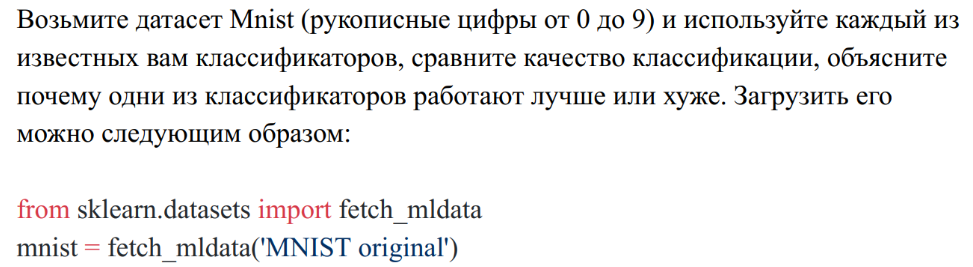

In [4]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto', as_frame = False)

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


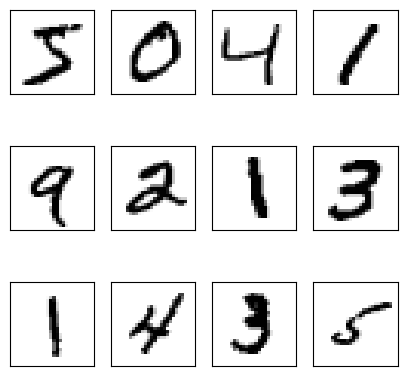

In [3]:
fig, ax = plt.subplots(3, 4, figsize=(5,5))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape((28,28)), cmap='binary')
    axi.set(xticks=[], yticks=[])

In [4]:
shuffle = True
X_train, X_test, y_train, y_test = train_test_split(X[:15000], y[:15000], test_size=0.35, shuffle=shuffle)

In [ ]:
def cross_val(clf, X, y, n_splits=10):

    skfolds = StratifiedKFold(n_splits=n_splits)
    acc = []
    clfs = []
    for train_index, test_index in skfolds.split(X_train, y_train):

        clone_clf = clone(clf)
        X_train_folds = X[train_index]
        y_train_folds = y[train_index]
        X_test_fold = X[test_index]
        y_test_fold = y[test_index]
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        t = np.sum([1 if y_pred[i] == y_test_fold[i] else 0 for i in range(X_test_fold.shape[0])])
        acc.append(t/len(X_test_fold))
        clfs.append(clone_clf)

    return clfs, acc

In [ ]:
def fit_clfs(clf_list: list, X, y):

    clfs = []
    accs = []
    for i in range(len(clf_list)):

        clf, acc = cross_val(clf_list[i], X, y)
        accs.append(np.max(acc))
        clfs.append(clf[np.argmax(acc)])

    return clfs, accs

In [ ]:
def show_wrong_predictions(X, y):

    fig, ax = plt.subplots(1, len(y), figsize = (10, 5))
    for axi, image, label in zip(ax, X, y):
        axi.imshow(image.reshape((28, 28)), cmap='binary')
        axi.set_title("Pred: %s" % str(label))
        axi.set(xticks=[], yticks=[])


def show_clfs_results(clfs, clfs_name, X_train, y_train, X_test, y_test):

    clfs, acc = fit_clfs(clfs, X_train, y_train)
    for i in range(len(clfs)):

        pred = clfs[i].predict(X_test)
        disp = ConfusionMatrixDisplay.from_predictions(y_test, pred)
        disp.figure_.suptitle(f"Confusion Matrix for {clfs_name[i]}")
        plt.show()
        print("Accuracy", acc[i])
        print(f"{classification_report(y_test, pred, zero_division=0)}\n")
        f = [i for i in range(len(pred)) if pred[i] != y_test[i]]
        show_wrong_predictions(X_test[f][:7], pred[:7])
    print(f"Best accuracy for {clfs_name[np.argmax(acc)]} =", np.max(acc))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 7
rfc_list = [RandomForestClassifier(max_depth=i+1) for i in range(max_depth)]
rfc_list_name = ["RFC(max_depth = "+str(i+1)+")" for i in range(max_depth)]

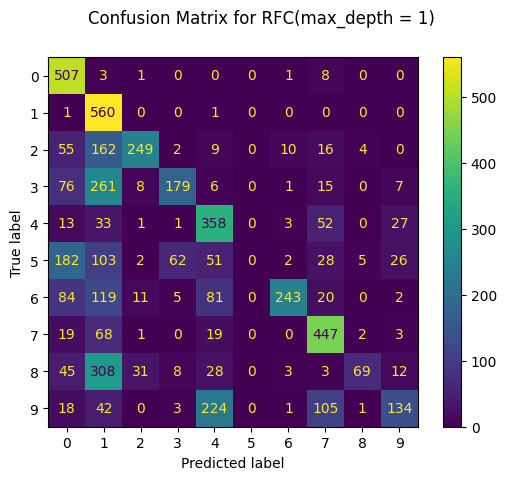

Accuracy 0.5425641025641026
              precision    recall  f1-score   support

           0       0.51      0.97      0.67       520
           1       0.34      1.00      0.50       562
           2       0.82      0.49      0.61       507
           3       0.69      0.32      0.44       553
           4       0.46      0.73      0.57       488
           5       0.00      0.00      0.00       461
           6       0.92      0.43      0.59       565
           7       0.64      0.80      0.71       559
           8       0.85      0.14      0.23       507
           9       0.64      0.25      0.36       528

    accuracy                           0.52      5250
   macro avg       0.59      0.51      0.47      5250
weighted avg       0.59      0.52      0.48      5250




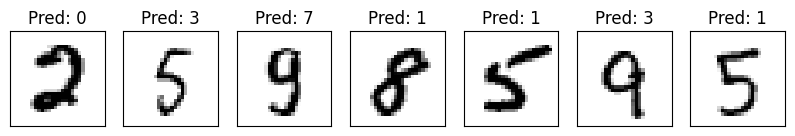

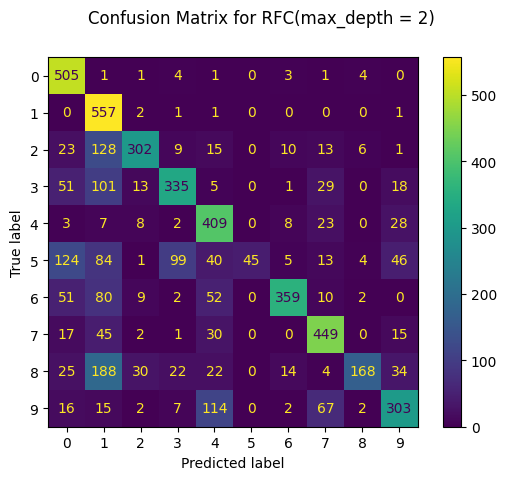

Accuracy 0.6492307692307693
              precision    recall  f1-score   support

           0       0.62      0.97      0.76       520
           1       0.46      0.99      0.63       562
           2       0.82      0.60      0.69       507
           3       0.70      0.61      0.65       553
           4       0.59      0.84      0.69       488
           5       1.00      0.10      0.18       461
           6       0.89      0.64      0.74       565
           7       0.74      0.80      0.77       559
           8       0.90      0.33      0.48       507
           9       0.68      0.57      0.62       528

    accuracy                           0.65      5250
   macro avg       0.74      0.64      0.62      5250
weighted avg       0.74      0.65      0.63      5250




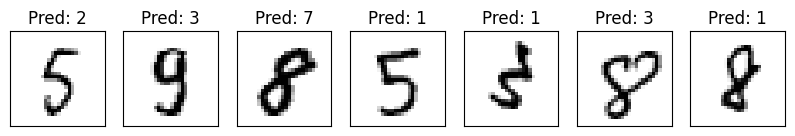

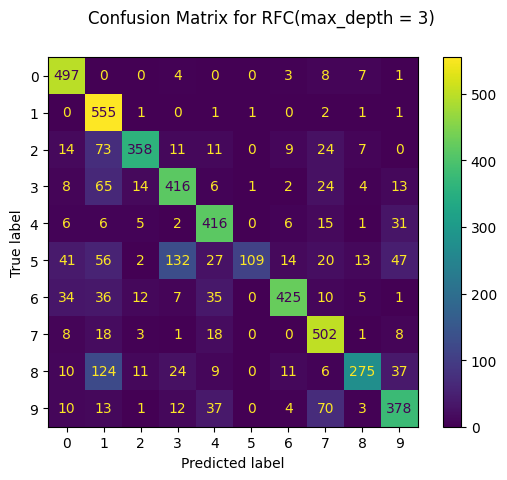

Accuracy 0.7610256410256411
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       520
           1       0.59      0.99      0.74       562
           2       0.88      0.71      0.78       507
           3       0.68      0.75      0.72       553
           4       0.74      0.85      0.79       488
           5       0.98      0.24      0.38       461
           6       0.90      0.75      0.82       565
           7       0.74      0.90      0.81       559
           8       0.87      0.54      0.67       507
           9       0.73      0.72      0.72       528

    accuracy                           0.75      5250
   macro avg       0.79      0.74      0.73      5250
weighted avg       0.79      0.75      0.73      5250




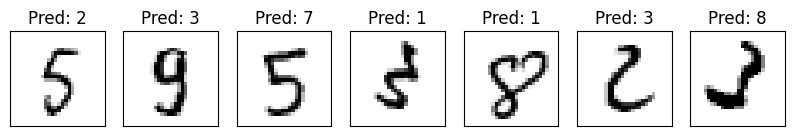

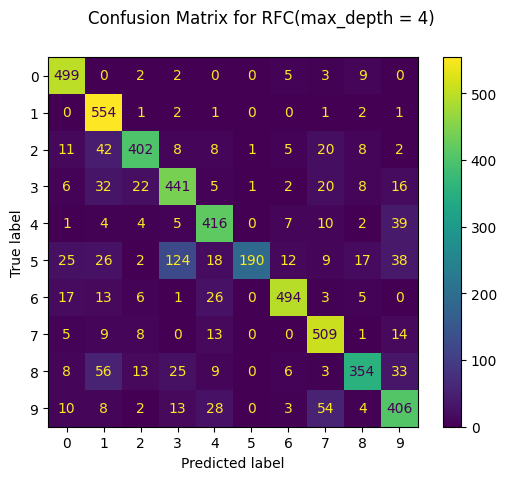

Accuracy 0.8153846153846154
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       520
           1       0.74      0.99      0.85       562
           2       0.87      0.79      0.83       507
           3       0.71      0.80      0.75       553
           4       0.79      0.85      0.82       488
           5       0.99      0.41      0.58       461
           6       0.93      0.87      0.90       565
           7       0.81      0.91      0.85       559
           8       0.86      0.70      0.77       507
           9       0.74      0.77      0.75       528

    accuracy                           0.81      5250
   macro avg       0.83      0.81      0.80      5250
weighted avg       0.83      0.81      0.81      5250




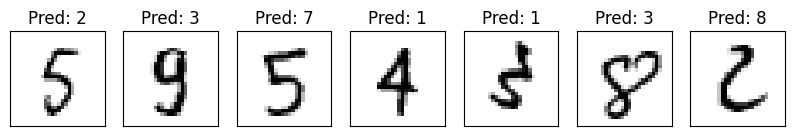

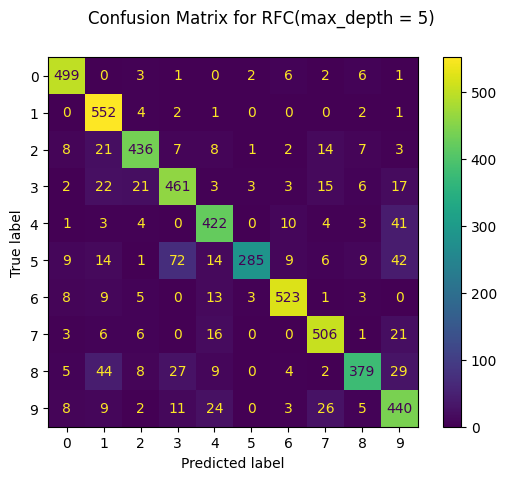

Accuracy 0.8666666666666667
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       520
           1       0.81      0.98      0.89       562
           2       0.89      0.86      0.87       507
           3       0.79      0.83      0.81       553
           4       0.83      0.86      0.85       488
           5       0.97      0.62      0.75       461
           6       0.93      0.93      0.93       565
           7       0.88      0.91      0.89       559
           8       0.90      0.75      0.82       507
           9       0.74      0.83      0.78       528

    accuracy                           0.86      5250
   macro avg       0.87      0.85      0.85      5250
weighted avg       0.86      0.86      0.86      5250




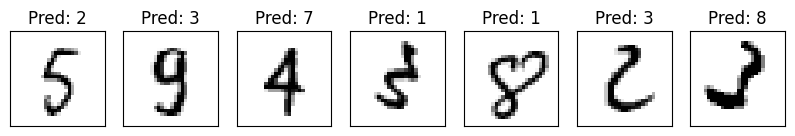

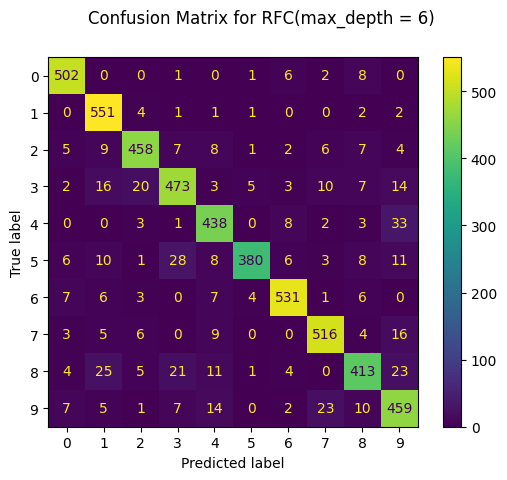

Accuracy 0.8943589743589744
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       520
           1       0.88      0.98      0.93       562
           2       0.91      0.90      0.91       507
           3       0.88      0.86      0.87       553
           4       0.88      0.90      0.89       488
           5       0.97      0.82      0.89       461
           6       0.94      0.94      0.94       565
           7       0.92      0.92      0.92       559
           8       0.88      0.81      0.85       507
           9       0.82      0.87      0.84       528

    accuracy                           0.90      5250
   macro avg       0.90      0.90      0.90      5250
weighted avg       0.90      0.90      0.90      5250




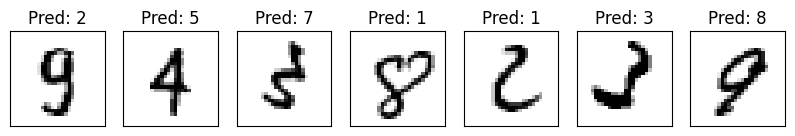

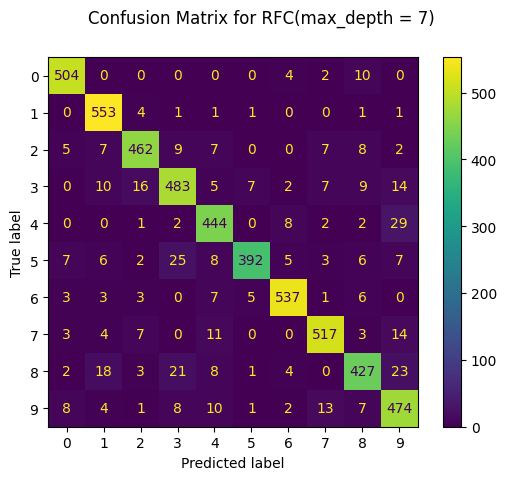

Accuracy 0.92
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.91      0.98      0.95       562
           2       0.93      0.91      0.92       507
           3       0.88      0.87      0.88       553
           4       0.89      0.91      0.90       488
           5       0.96      0.85      0.90       461
           6       0.96      0.95      0.95       565
           7       0.94      0.92      0.93       559
           8       0.89      0.84      0.87       507
           9       0.84      0.90      0.87       528

    accuracy                           0.91      5250
   macro avg       0.91      0.91      0.91      5250
weighted avg       0.91      0.91      0.91      5250


Best accuracy for RFC(max_depth = 7) = 0.92


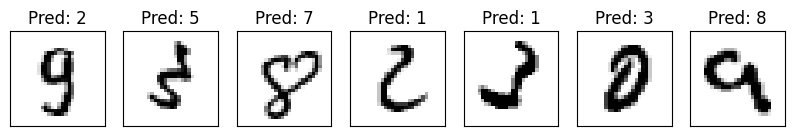

In [ ]:
show_clfs_results(rfc_list, rfc_list_name, X_train, y_train, X_test, y_test)

In [ ]:
k = 10
knn_list = [KNeighborsClassifier(n_neighbors=i+2) for i in range(k)]
knn_list_name = ["KNN(k = "+str(i+2)+")" for i in range(k)]

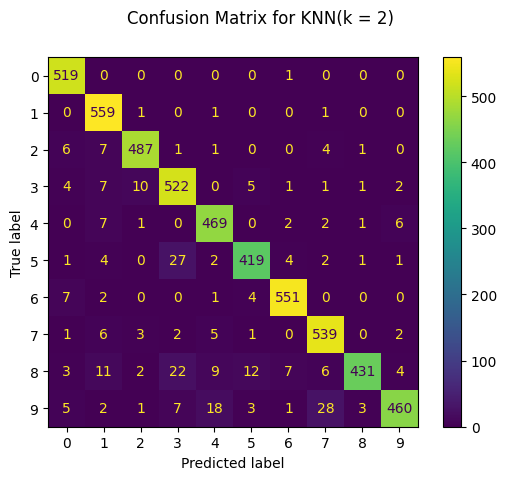

Accuracy 0.9446153846153846
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       520
           1       0.92      0.99      0.96       562
           2       0.96      0.96      0.96       507
           3       0.90      0.94      0.92       553
           4       0.93      0.96      0.94       488
           5       0.94      0.91      0.93       461
           6       0.97      0.98      0.97       565
           7       0.92      0.96      0.94       559
           8       0.98      0.85      0.91       507
           9       0.97      0.87      0.92       528

    accuracy                           0.94      5250
   macro avg       0.95      0.94      0.94      5250
weighted avg       0.95      0.94      0.94      5250




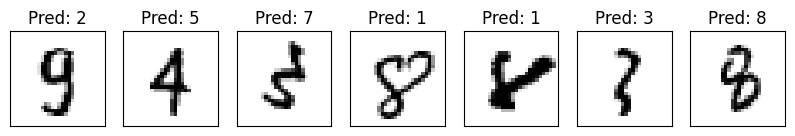

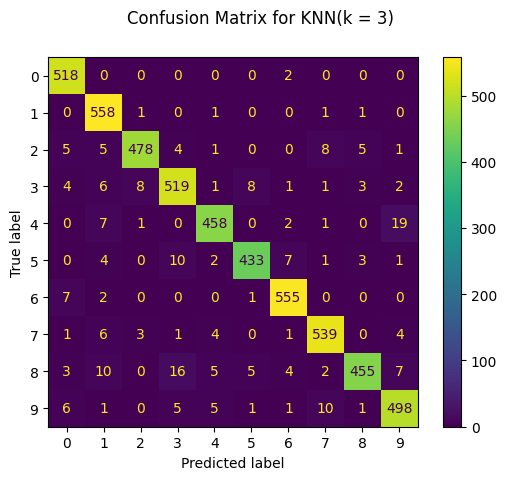

Accuracy 0.9579487179487179
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       520
           1       0.93      0.99      0.96       562
           2       0.97      0.94      0.96       507
           3       0.94      0.94      0.94       553
           4       0.96      0.94      0.95       488
           5       0.97      0.94      0.95       461
           6       0.97      0.98      0.98       565
           7       0.96      0.96      0.96       559
           8       0.97      0.90      0.93       507
           9       0.94      0.94      0.94       528

    accuracy                           0.95      5250
   macro avg       0.96      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




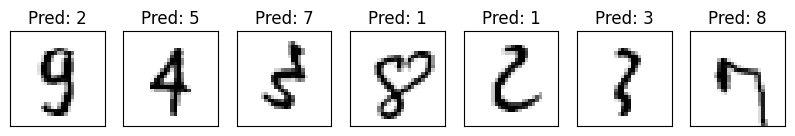

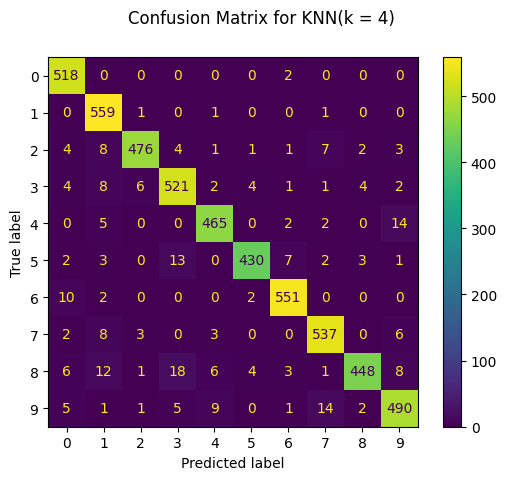

Accuracy 0.9528205128205128
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       520
           1       0.92      0.99      0.96       562
           2       0.98      0.94      0.96       507
           3       0.93      0.94      0.94       553
           4       0.95      0.95      0.95       488
           5       0.98      0.93      0.95       461
           6       0.97      0.98      0.97       565
           7       0.95      0.96      0.96       559
           8       0.98      0.88      0.93       507
           9       0.94      0.93      0.93       528

    accuracy                           0.95      5250
   macro avg       0.95      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




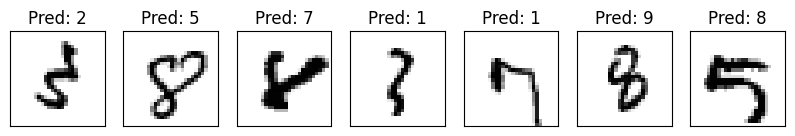

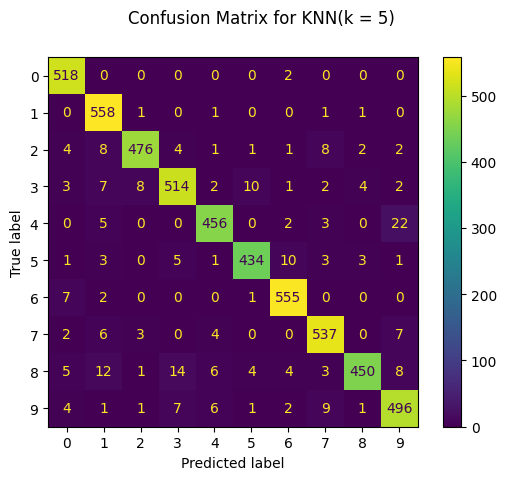

Accuracy 0.9579487179487179
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       520
           1       0.93      0.99      0.96       562
           2       0.97      0.94      0.95       507
           3       0.94      0.93      0.94       553
           4       0.96      0.93      0.95       488
           5       0.96      0.94      0.95       461
           6       0.96      0.98      0.97       565
           7       0.95      0.96      0.95       559
           8       0.98      0.89      0.93       507
           9       0.92      0.94      0.93       528

    accuracy                           0.95      5250
   macro avg       0.95      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




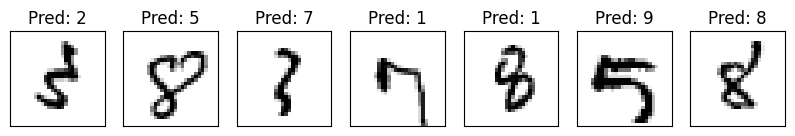

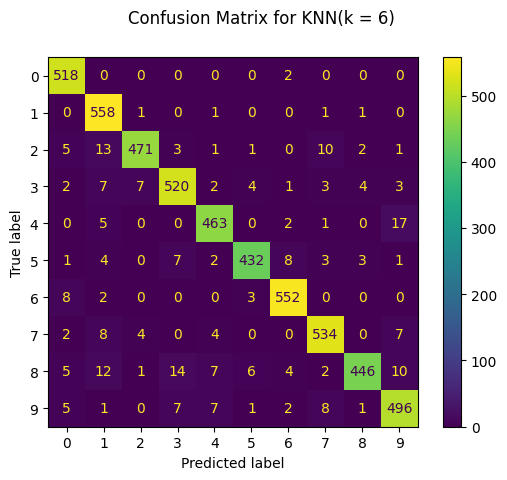

Accuracy 0.9528205128205128
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       520
           1       0.91      0.99      0.95       562
           2       0.97      0.93      0.95       507
           3       0.94      0.94      0.94       553
           4       0.95      0.95      0.95       488
           5       0.97      0.94      0.95       461
           6       0.97      0.98      0.97       565
           7       0.95      0.96      0.95       559
           8       0.98      0.88      0.93       507
           9       0.93      0.94      0.93       528

    accuracy                           0.95      5250
   macro avg       0.95      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




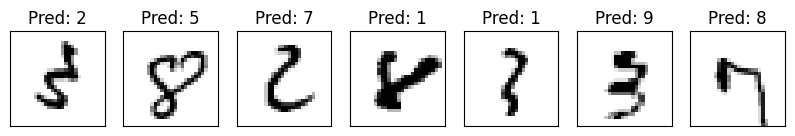

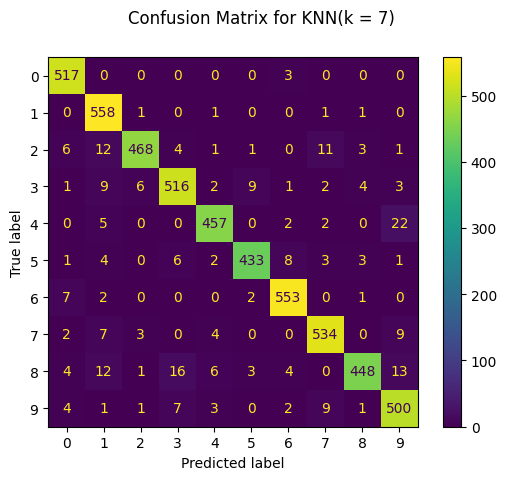

Accuracy 0.9538461538461539
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       520
           1       0.91      0.99      0.95       562
           2       0.97      0.92      0.95       507
           3       0.94      0.93      0.94       553
           4       0.96      0.94      0.95       488
           5       0.97      0.94      0.95       461
           6       0.97      0.98      0.97       565
           7       0.95      0.96      0.95       559
           8       0.97      0.88      0.93       507
           9       0.91      0.95      0.93       528

    accuracy                           0.95      5250
   macro avg       0.95      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




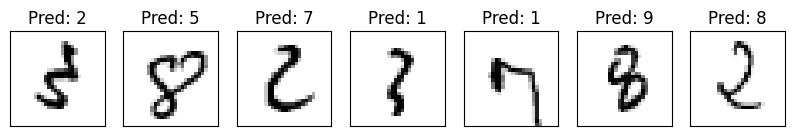

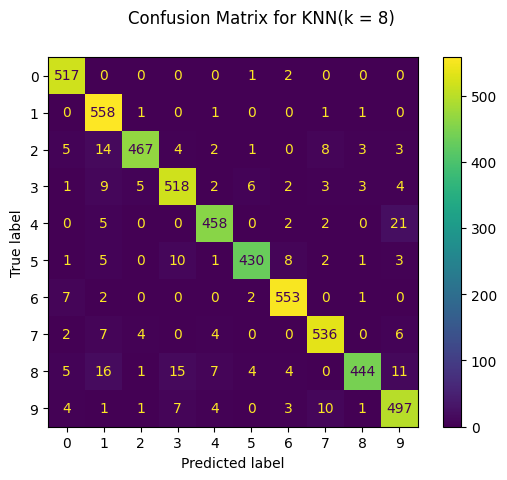

Accuracy 0.9517948717948718
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       520
           1       0.90      0.99      0.95       562
           2       0.97      0.92      0.95       507
           3       0.94      0.94      0.94       553
           4       0.96      0.94      0.95       488
           5       0.97      0.93      0.95       461
           6       0.96      0.98      0.97       565
           7       0.95      0.96      0.96       559
           8       0.98      0.88      0.92       507
           9       0.91      0.94      0.93       528

    accuracy                           0.95      5250
   macro avg       0.95      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




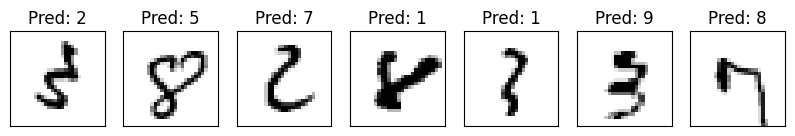

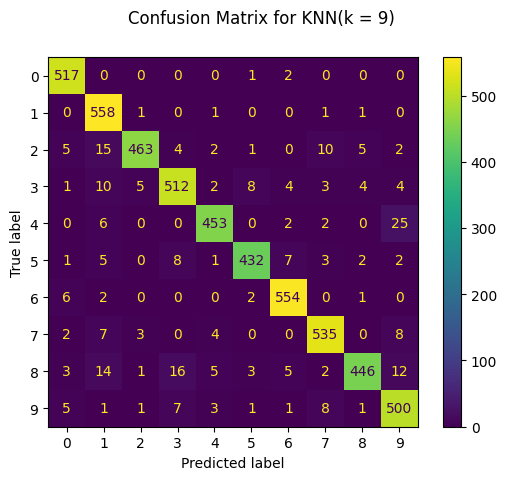

Accuracy 0.9497435897435897
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       520
           1       0.90      0.99      0.95       562
           2       0.98      0.91      0.94       507
           3       0.94      0.93      0.93       553
           4       0.96      0.93      0.94       488
           5       0.96      0.94      0.95       461
           6       0.96      0.98      0.97       565
           7       0.95      0.96      0.95       559
           8       0.97      0.88      0.92       507
           9       0.90      0.95      0.93       528

    accuracy                           0.95      5250
   macro avg       0.95      0.95      0.95      5250
weighted avg       0.95      0.95      0.95      5250




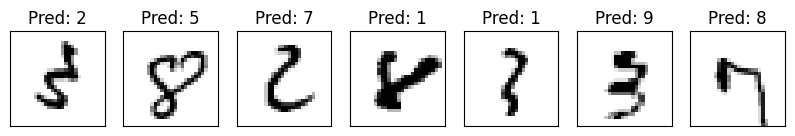

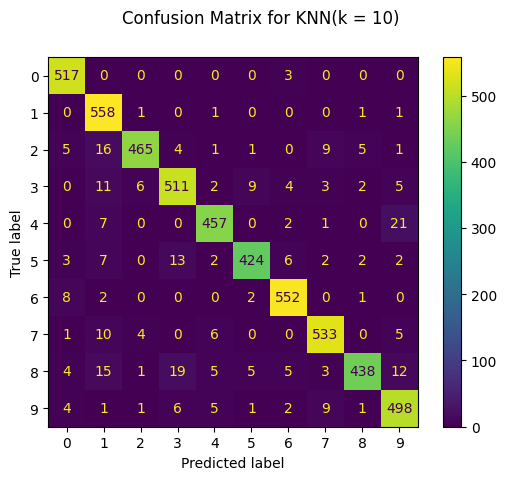

Accuracy 0.9487179487179487
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       520
           1       0.89      0.99      0.94       562
           2       0.97      0.92      0.94       507
           3       0.92      0.92      0.92       553
           4       0.95      0.94      0.95       488
           5       0.96      0.92      0.94       461
           6       0.96      0.98      0.97       565
           7       0.95      0.95      0.95       559
           8       0.97      0.86      0.92       507
           9       0.91      0.94      0.93       528

    accuracy                           0.94      5250
   macro avg       0.95      0.94      0.94      5250
weighted avg       0.94      0.94      0.94      5250




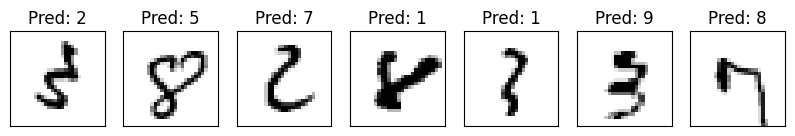

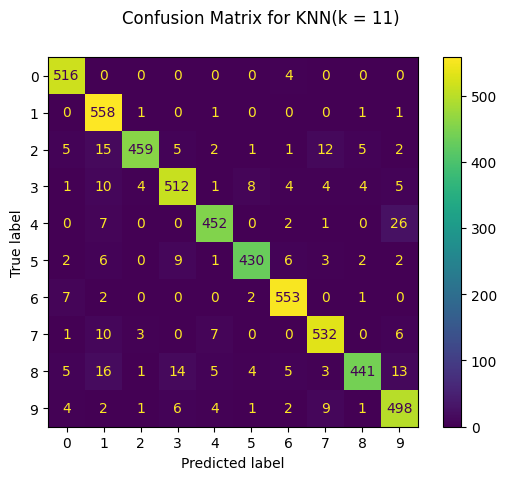

Accuracy 0.9507692307692308
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       520
           1       0.89      0.99      0.94       562
           2       0.98      0.91      0.94       507
           3       0.94      0.93      0.93       553
           4       0.96      0.93      0.94       488
           5       0.96      0.93      0.95       461
           6       0.96      0.98      0.97       565
           7       0.94      0.95      0.95       559
           8       0.97      0.87      0.92       507
           9       0.90      0.94      0.92       528

    accuracy                           0.94      5250
   macro avg       0.95      0.94      0.94      5250
weighted avg       0.94      0.94      0.94      5250


Best accuracy for KNN(k = 3) = 0.9579487179487179


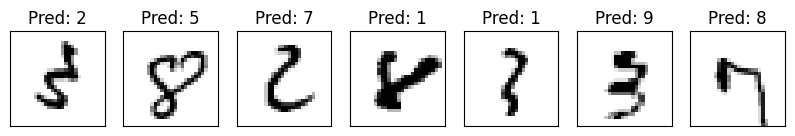

In [ ]:
show_clfs_results(knn_list, knn_list_name, X_train, y_train, X_test, y_test)

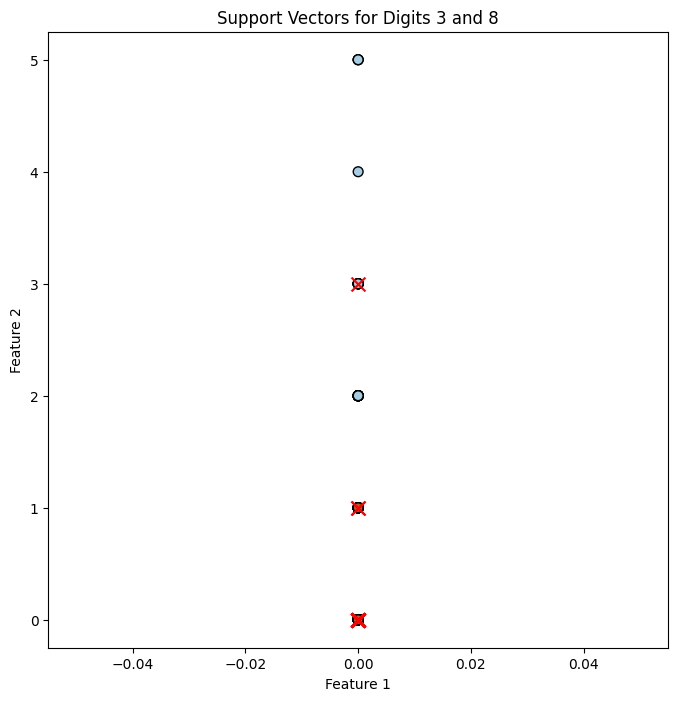

In [5]:
from sklearn import datasets
from sklearn import svm


digits = datasets.load_digits()
digit_1 = 3
digit_2 = 8

indices = np.where((digits.target == digit_1) | (digits.target == digit_2))
X_d = digits.data[indices]
y_d = digits.target[indices]

X_train, X_test, y_train, y_test = train_test_split(X_d[:6000], y_d[:6000], test_size=0.2, random_state=42)

svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

support_vectors = svm_classifier.support_vectors_

plt.figure(figsize=(8, 8))
plt.scatter(X_d[:, 56], X_d[:, 57], c=y_d, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
plt.scatter(support_vectors[:, 56], support_vectors[:, 57], s=100, facecolors='red', marker='x')
plt.title('Support Vectors for Digits {} and {}'.format(digit_1, digit_2))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_list = [svm.SVC(kernel = kernels[i]) for i in range(len(kernels))]
kernels = ["SVC " + kernels[i] +" kernel" for i in range(len(kernels))]

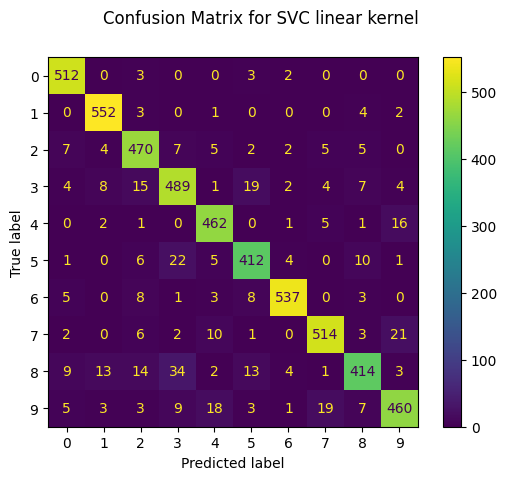

Accuracy 0.9323076923076923
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       520
           1       0.95      0.98      0.97       562
           2       0.89      0.93      0.91       507
           3       0.87      0.88      0.88       553
           4       0.91      0.95      0.93       488
           5       0.89      0.89      0.89       461
           6       0.97      0.95      0.96       565
           7       0.94      0.92      0.93       559
           8       0.91      0.82      0.86       507
           9       0.91      0.87      0.89       528

    accuracy                           0.92      5250
   macro avg       0.92      0.92      0.92      5250
weighted avg       0.92      0.92      0.92      5250




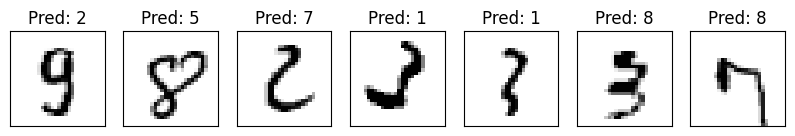

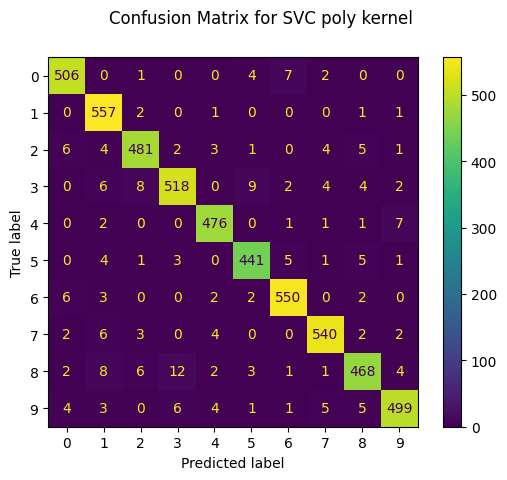

Accuracy 0.963076923076923
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       520
           1       0.94      0.99      0.96       562
           2       0.96      0.95      0.95       507
           3       0.96      0.94      0.95       553
           4       0.97      0.98      0.97       488
           5       0.96      0.96      0.96       461
           6       0.97      0.97      0.97       565
           7       0.97      0.97      0.97       559
           8       0.95      0.92      0.94       507
           9       0.97      0.95      0.96       528

    accuracy                           0.96      5250
   macro avg       0.96      0.96      0.96      5250
weighted avg       0.96      0.96      0.96      5250




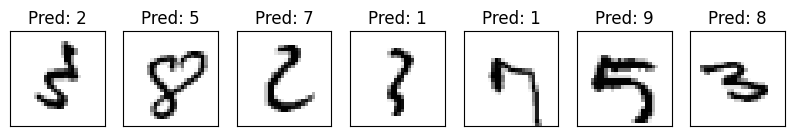

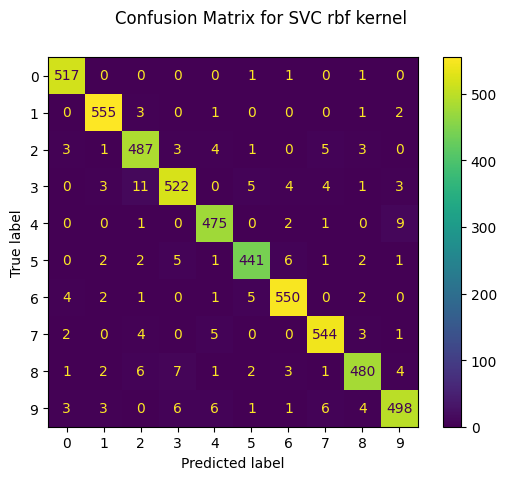

Accuracy 0.9743589743589743
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       520
           1       0.98      0.99      0.98       562
           2       0.95      0.96      0.95       507
           3       0.96      0.94      0.95       553
           4       0.96      0.97      0.97       488
           5       0.97      0.96      0.96       461
           6       0.97      0.97      0.97       565
           7       0.97      0.97      0.97       559
           8       0.97      0.95      0.96       507
           9       0.96      0.94      0.95       528

    accuracy                           0.97      5250
   macro avg       0.97      0.97      0.97      5250
weighted avg       0.97      0.97      0.97      5250




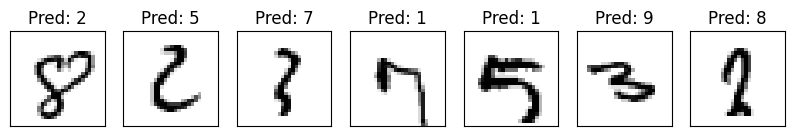

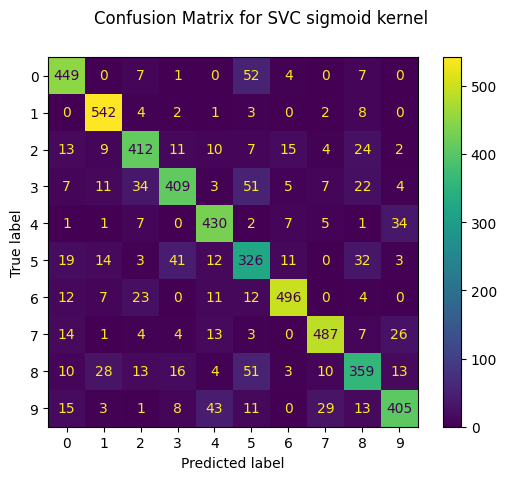

Accuracy 0.8266666666666667
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       520
           1       0.88      0.96      0.92       562
           2       0.81      0.81      0.81       507
           3       0.83      0.74      0.78       553
           4       0.82      0.88      0.85       488
           5       0.63      0.71      0.67       461
           6       0.92      0.88      0.90       565
           7       0.90      0.87      0.88       559
           8       0.75      0.71      0.73       507
           9       0.83      0.77      0.80       528

    accuracy                           0.82      5250
   macro avg       0.82      0.82      0.82      5250
weighted avg       0.82      0.82      0.82      5250


Best accuracy for SVC rbf kernel = 0.9743589743589743


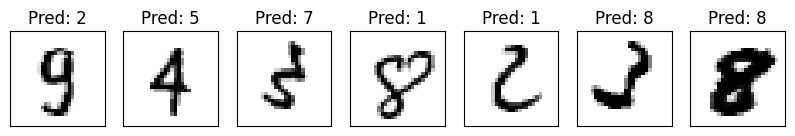

In [ ]:
show_clfs_results(svc_list, kernels, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 7
dtc_list = [DecisionTreeClassifier(max_depth=i+1) for i in range(max_depth)]
dtc_list_name = ["DT(max_depth = "+str(i+1)+")" for i in range(max_depth)]

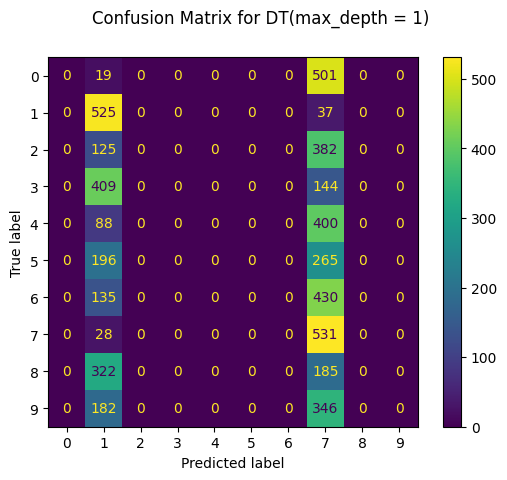

Accuracy 0.21025641025641026
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       520
           1       0.26      0.93      0.41       562
           2       0.00      0.00      0.00       507
           3       0.00      0.00      0.00       553
           4       0.00      0.00      0.00       488
           5       0.00      0.00      0.00       461
           6       0.00      0.00      0.00       565
           7       0.16      0.95      0.28       559
           8       0.00      0.00      0.00       507
           9       0.00      0.00      0.00       528

    accuracy                           0.20      5250
   macro avg       0.04      0.19      0.07      5250
weighted avg       0.05      0.20      0.07      5250




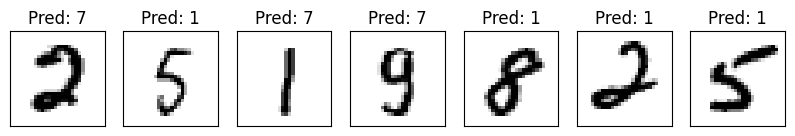

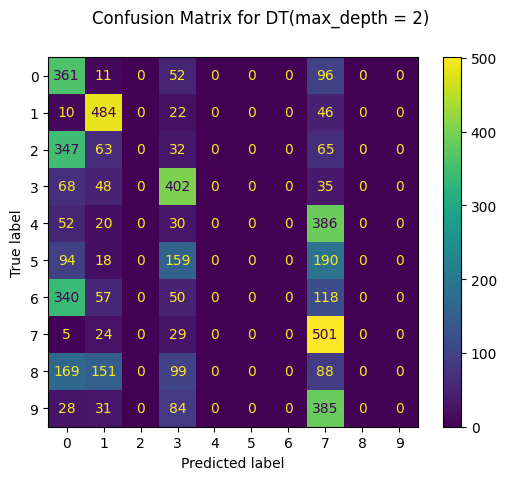

Accuracy 0.3528205128205128
              precision    recall  f1-score   support

           0       0.24      0.69      0.36       520
           1       0.53      0.86      0.66       562
           2       0.00      0.00      0.00       507
           3       0.42      0.73      0.53       553
           4       0.00      0.00      0.00       488
           5       0.00      0.00      0.00       461
           6       0.00      0.00      0.00       565
           7       0.26      0.90      0.41       559
           8       0.00      0.00      0.00       507
           9       0.00      0.00      0.00       528

    accuracy                           0.33      5250
   macro avg       0.15      0.32      0.20      5250
weighted avg       0.15      0.33      0.21      5250




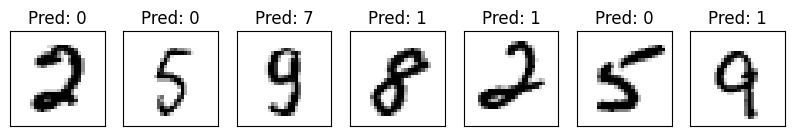

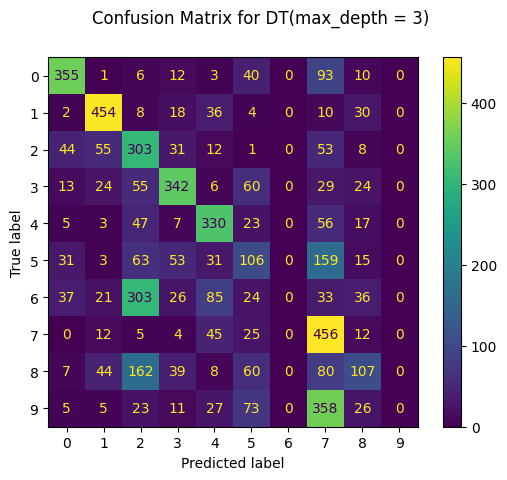

Accuracy 0.48615384615384616
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       520
           1       0.73      0.81      0.77       562
           2       0.31      0.60      0.41       507
           3       0.63      0.62      0.62       553
           4       0.57      0.68      0.62       488
           5       0.25      0.23      0.24       461
           6       0.00      0.00      0.00       565
           7       0.34      0.82      0.48       559
           8       0.38      0.21      0.27       507
           9       0.00      0.00      0.00       528

    accuracy                           0.47      5250
   macro avg       0.39      0.46      0.41      5250
weighted avg       0.39      0.47      0.41      5250




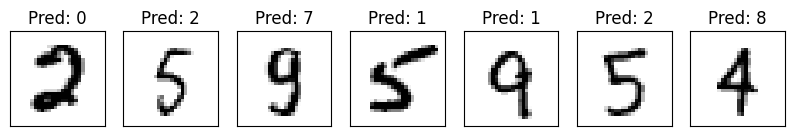

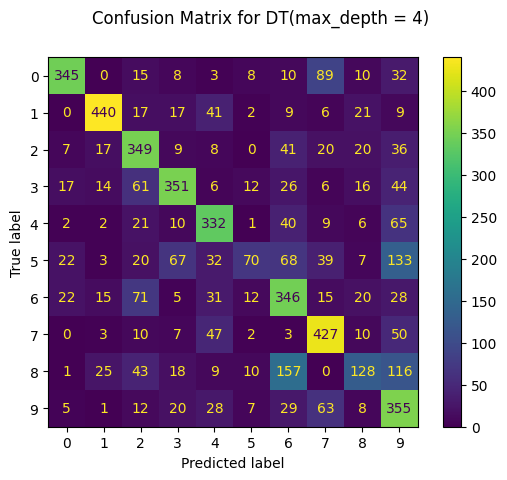

Accuracy 0.6153846153846154
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       520
           1       0.85      0.78      0.81       562
           2       0.56      0.69      0.62       507
           3       0.69      0.63      0.66       553
           4       0.62      0.68      0.65       488
           5       0.56      0.15      0.24       461
           6       0.47      0.61      0.53       565
           7       0.63      0.76      0.69       559
           8       0.52      0.25      0.34       507
           9       0.41      0.67      0.51       528

    accuracy                           0.60      5250
   macro avg       0.61      0.59      0.58      5250
weighted avg       0.62      0.60      0.59      5250




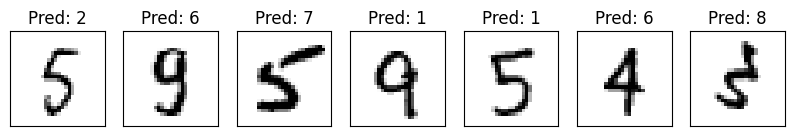

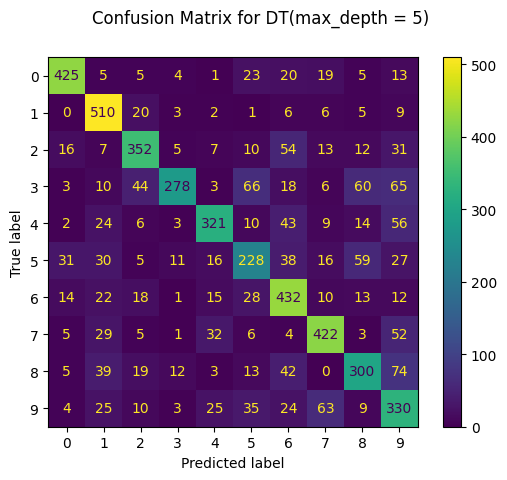

Accuracy 0.7066666666666667
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       520
           1       0.73      0.91      0.81       562
           2       0.73      0.69      0.71       507
           3       0.87      0.50      0.64       553
           4       0.76      0.66      0.70       488
           5       0.54      0.49      0.52       461
           6       0.63      0.76      0.69       565
           7       0.75      0.75      0.75       559
           8       0.62      0.59      0.61       507
           9       0.49      0.62      0.55       528

    accuracy                           0.69      5250
   macro avg       0.70      0.68      0.68      5250
weighted avg       0.70      0.69      0.68      5250




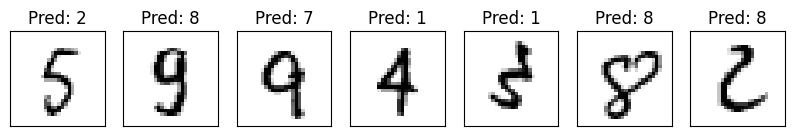

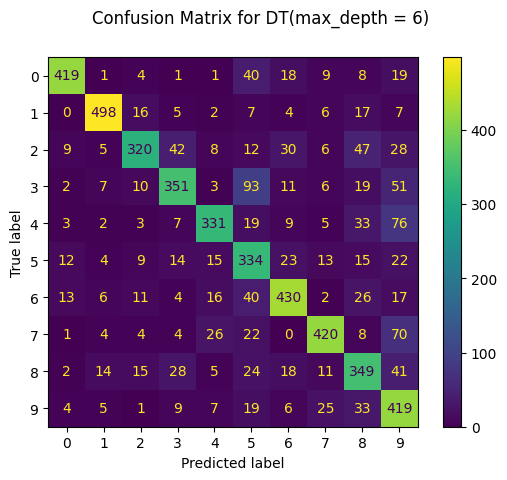

Accuracy 0.762051282051282
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       520
           1       0.91      0.89      0.90       562
           2       0.81      0.63      0.71       507
           3       0.75      0.63      0.69       553
           4       0.80      0.68      0.73       488
           5       0.55      0.72      0.62       461
           6       0.78      0.76      0.77       565
           7       0.83      0.75      0.79       559
           8       0.63      0.69      0.66       507
           9       0.56      0.79      0.66       528

    accuracy                           0.74      5250
   macro avg       0.75      0.74      0.74      5250
weighted avg       0.76      0.74      0.74      5250




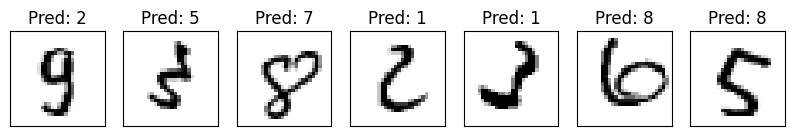

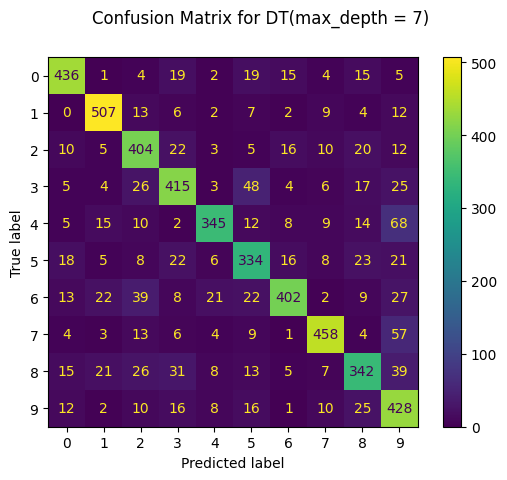

Accuracy 0.7866666666666666
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       520
           1       0.87      0.90      0.88       562
           2       0.73      0.80      0.76       507
           3       0.76      0.75      0.75       553
           4       0.86      0.71      0.78       488
           5       0.69      0.72      0.71       461
           6       0.86      0.71      0.78       565
           7       0.88      0.82      0.85       559
           8       0.72      0.67      0.70       507
           9       0.62      0.81      0.70       528

    accuracy                           0.78      5250
   macro avg       0.78      0.77      0.77      5250
weighted avg       0.78      0.78      0.78      5250


Best accuracy for DT(max_depth = 7) = 0.7866666666666666


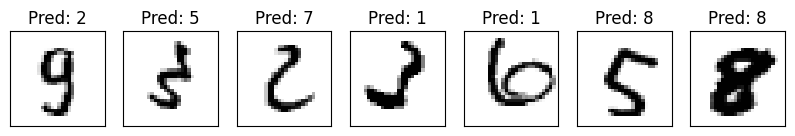

In [ ]:
show_clfs_results(dtc_list, dtc_list_name, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression


c = [3., 1., 0.5, 0.1, 0.0025, 0.001]
lr_list = [LogisticRegression(C=c[i]) for i in range(len(c))]
lr_list_name = ["LogisticRegression(C = "+str(c[i])+")" for i in range(len(c))]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

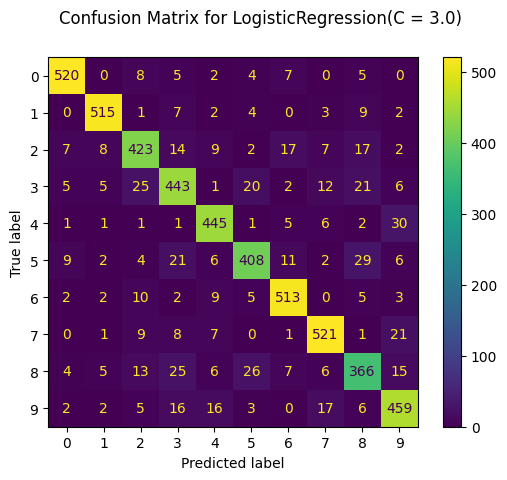

Accuracy 0.8851282051282051
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       551
           1       0.95      0.95      0.95       543
           2       0.85      0.84      0.84       506
           3       0.82      0.82      0.82       540
           4       0.88      0.90      0.89       493
           5       0.86      0.82      0.84       498
           6       0.91      0.93      0.92       551
           7       0.91      0.92      0.91       569
           8       0.79      0.77      0.78       473
           9       0.84      0.87      0.86       526

    accuracy                           0.88      5250
   macro avg       0.88      0.88      0.88      5250
weighted avg       0.88      0.88      0.88      5250




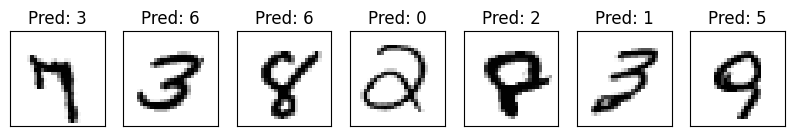

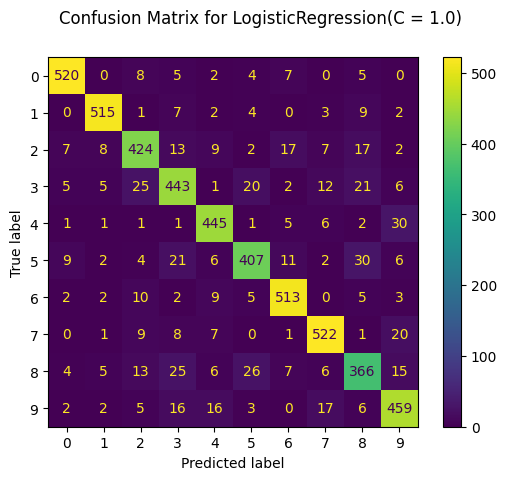

Accuracy 0.8851282051282051
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       551
           1       0.95      0.95      0.95       543
           2       0.85      0.84      0.84       506
           3       0.82      0.82      0.82       540
           4       0.88      0.90      0.89       493
           5       0.86      0.82      0.84       498
           6       0.91      0.93      0.92       551
           7       0.91      0.92      0.91       569
           8       0.79      0.77      0.78       473
           9       0.85      0.87      0.86       526

    accuracy                           0.88      5250
   macro avg       0.88      0.88      0.88      5250
weighted avg       0.88      0.88      0.88      5250




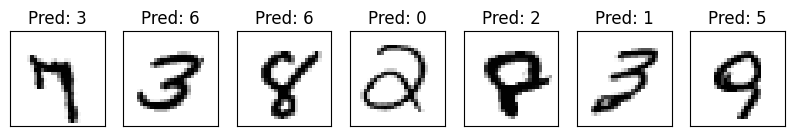

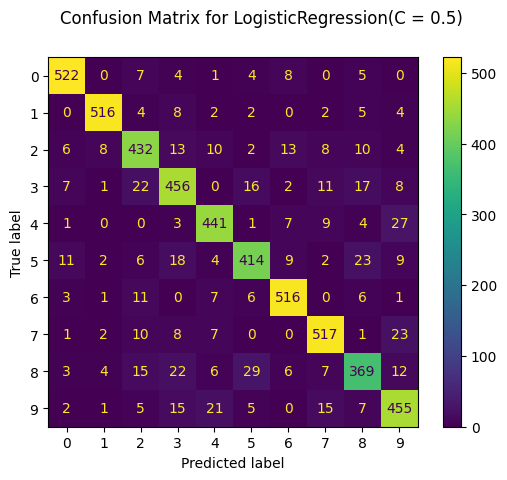

Accuracy 0.8902564102564102
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       551
           1       0.96      0.95      0.96       543
           2       0.84      0.85      0.85       506
           3       0.83      0.84      0.84       540
           4       0.88      0.89      0.89       493
           5       0.86      0.83      0.85       498
           6       0.92      0.94      0.93       551
           7       0.91      0.91      0.91       569
           8       0.83      0.78      0.80       473
           9       0.84      0.87      0.85       526

    accuracy                           0.88      5250
   macro avg       0.88      0.88      0.88      5250
weighted avg       0.88      0.88      0.88      5250




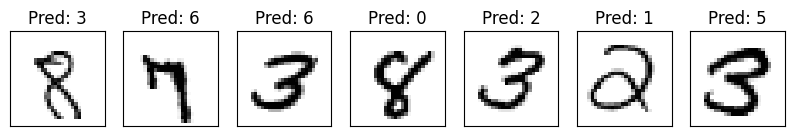

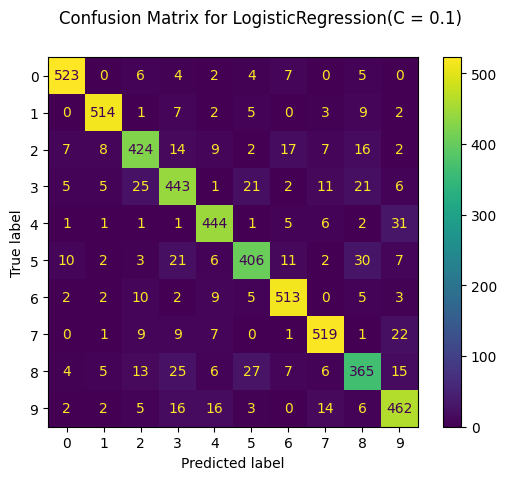

Accuracy 0.8861538461538462
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       551
           1       0.95      0.95      0.95       543
           2       0.85      0.84      0.85       506
           3       0.82      0.82      0.82       540
           4       0.88      0.90      0.89       493
           5       0.86      0.82      0.84       498
           6       0.91      0.93      0.92       551
           7       0.91      0.91      0.91       569
           8       0.79      0.77      0.78       473
           9       0.84      0.88      0.86       526

    accuracy                           0.88      5250
   macro avg       0.88      0.88      0.88      5250
weighted avg       0.88      0.88      0.88      5250




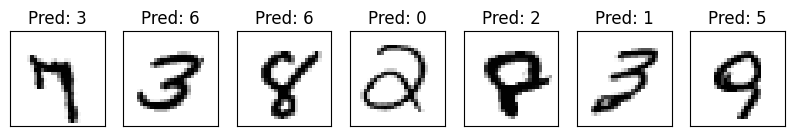

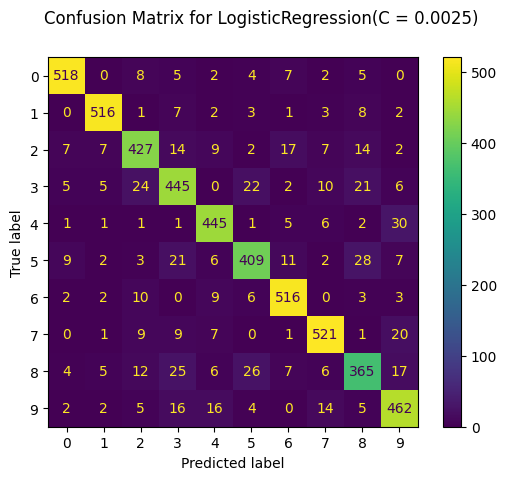

Accuracy 0.8871794871794871
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       551
           1       0.95      0.95      0.95       543
           2       0.85      0.84      0.85       506
           3       0.82      0.82      0.82       540
           4       0.89      0.90      0.89       493
           5       0.86      0.82      0.84       498
           6       0.91      0.94      0.92       551
           7       0.91      0.92      0.91       569
           8       0.81      0.77      0.79       473
           9       0.84      0.88      0.86       526

    accuracy                           0.88      5250
   macro avg       0.88      0.88      0.88      5250
weighted avg       0.88      0.88      0.88      5250




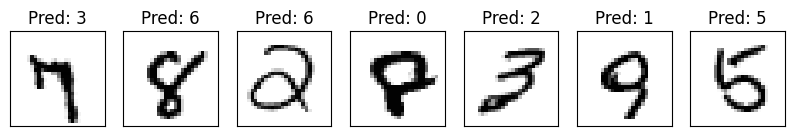

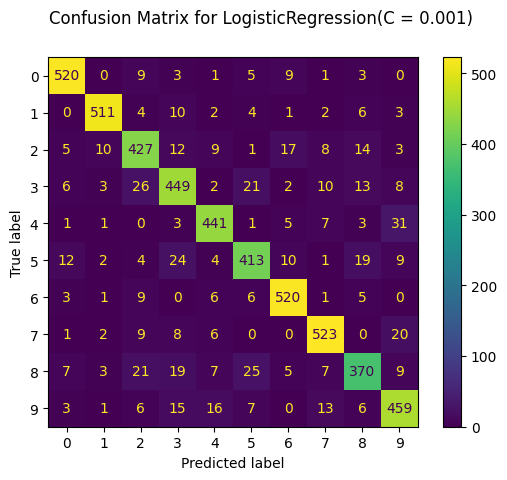

Accuracy 0.8871794871794871
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       551
           1       0.96      0.94      0.95       543
           2       0.83      0.84      0.84       506
           3       0.83      0.83      0.83       540
           4       0.89      0.89      0.89       493
           5       0.86      0.83      0.84       498
           6       0.91      0.94      0.93       551
           7       0.91      0.92      0.92       569
           8       0.84      0.78      0.81       473
           9       0.85      0.87      0.86       526

    accuracy                           0.88      5250
   macro avg       0.88      0.88      0.88      5250
weighted avg       0.88      0.88      0.88      5250


Best accuracy for LogisticRegression(C = 0.5) = 0.8902564102564102


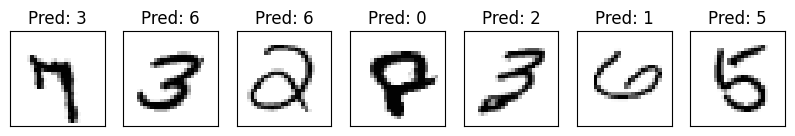

In [ ]:
show_clfs_results(lr_list, lr_list_name, X_train, y_train, X_test, y_test)

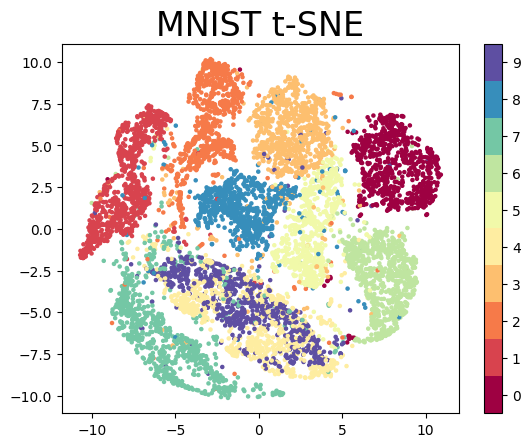

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


x_subset = X[:8000]
y_subset = [int(y[i]) for i in range(8000)]
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)
pca_tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('MNIST t-SNE', fontsize=24)
plt.show()

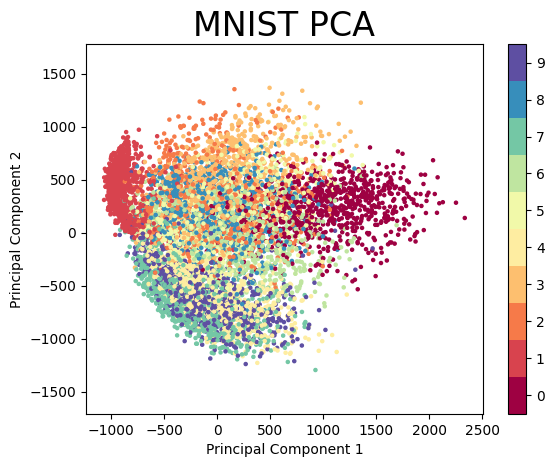

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X[:8000])
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s=5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('MNIST PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()